<a href="https://colab.research.google.com/github/ZerXXX0/sales-prediction/blob/main/MLQ.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
import pandas as pd

# Load the CSV files
member_df = pd.read_csv("https://drive.google.com/file/d/1xxAV-LGPpTm4WkB-iXRhlVNTLoVfWV-M/view?usp=sharing")
transaction_df = pd.read_csv("https://drive.google.com/file/d/1tN5AhZcfLIzRW1LRIk6kZ2wA8jY8fyCI/view?usp=sharing")
label_df = pd.read_csv("https://drive.google.com/file/d/1_NRq0-epuYMdgroJhb43lCRS7InGM0pu/view?usp=sharing")

# Merge transaction data with member data
transaction_member_df = pd.merge(transaction_df, member_df, on="MemberID", how="left")

# Merge the above result with label data
final_df = pd.merge(transaction_member_df, label_df, on="MemberID", how="left")

# Save the final merged DataFrame to a CSV file
final_df.to_csv("combined_member_transaction_label.csv", index=False)

print("CSV file saved as combined_member_transaction_label.csv")


ParserError: Error tokenizing data. C error: Expected 1 fields in line 3, saw 3364


In [4]:
df = pd.read_csv("/content/combined_member_transaction_label.csv")

In [7]:
df.head()

,TransactionID,MemberID,Source,FK_PRODUCT_ID,FK_PROD_GRAM_ID,Qty,PricePerUnit,TransactionDatetime,JoinDate,DateOfBirth,City,NoOfChild,EldestKidDOB,YoungestKidDOB,next_buy
0,ffd6c035bef03a2c386caf2552148fb2402b0b24,7ef72aa51aecb701dc5c4074480fcdf6,ELANG,27,52,1,NaN,2020-07-01 07:41:00 UTC,2019-12-24,NaN,BEKASI,1,2017-07-31,2017-07-31,0
1,4fadf10aff7e250cc8d63badeaefdf383c0e1c13,577f1b9a093c2cec6398b1118f5d99ab,ALFAMART,22,39,1,290000.0,2020-07-01 07:24:00 UTC,2019-08-29,NaN,JAMBI,2,2017-03-08,2019-01-27,0
2,7299df1aaf47b52017f58dd8e59df1fe37072670,e2ee74f248a74ed886a22f14348fbafd,EKTONG,22,39,1,263500.0,2020-07-01 09:13:00 UTC,2018-06-19,NaN,MAKASAR,2,2017-06-04,2019-04-10,0
3,22dae0e1e8bb87601eabd712721bd249739bc620,cefa8ef7469a8b4e6df3f745d4905000,CITRA,27,52,3,145000.0,2020-07-01 08:28:00 UTC,2019-05-06,NaN,SIDOARJO,1,2016-11-16,2016-11-16,0
4,6a744d5d79e09b0c1646e604db1c4ec65eff73d7,5eecda17ddf06ed9d79f298b13f84785,INDOMARET,27,52,1,165900.0,2020-07-01 07:02:00 UTC,2020-05-05,NaN,SUKABUMI,1,2018-05-22,2018-05-22,0


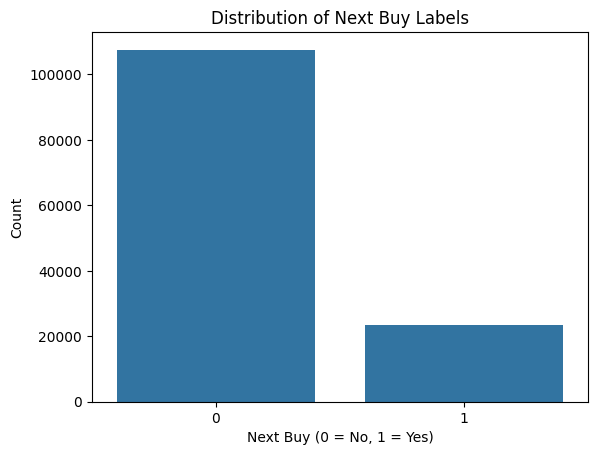

In [8]:
sns.countplot(data=df, x='next_buy')
plt.title('Distribution of Next Buy Labels')
plt.xlabel('Next Buy (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130854 entries, 0 to 130853
Columns: 4935 entries, TransactionID to YoungestKidDOB_2021-06-21
dtypes: bool(4923), float64(2), int64(4), object(6)
memory usage: 626.3+ MB


In [13]:
# prompt: normalize these column, 'Source', 'City', 'NoOfChild', 'YoungestKidDOB'

import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Identify the columns to normalize
columns_to_normalize = ['Source', 'City', 'NoOfChild', 'YoungestKidDOB']

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Apply normalization to the selected columns
# Make sure to handle potential non-numeric data or NaNs in these columns if necessary
# For simplicity, assuming these columns are numeric for now.
# If 'YoungestKidDOB' is a date, you might need a different approach.
# For 'Source' and 'City', if they are categorical, you might need one-hot encoding instead.

# For this example, assuming they are numeric and applying MinMaxScaler
# Check if the columns exist in the DataFrame and if they are numeric
numeric_cols_to_normalize = [col for col in columns_to_normalize if col in df.columns and pd.api.types.is_numeric_dtype(df[col])]

if numeric_cols_to_normalize:
    df[numeric_cols_to_normalize] = scaler.fit_transform(df[numeric_cols_to_normalize])
    print(f"Normalized columns: {numeric_cols_to_normalize}")
else:
    print("No numeric columns found among the specified columns to normalize.")

# If 'Source' or 'City' are categorical, consider one-hot encoding
categorical_cols_to_encode = [col for col in columns_to_normalize if col in df.columns and pd.api.types.is_object_dtype(df[col])]

if categorical_cols_to_encode:
    df = pd.get_dummies(df, columns=categorical_cols_to_encode, dummy_na=False) # dummy_na=False to drop NaN columns
    print(f"One-hot encoded columns: {categorical_cols_to_encode}")

Normalized columns: ['NoOfChild']
One-hot encoded columns: ['Source', 'City', 'YoungestKidDOB']


In [12]:
# prompt: make me correlation heatmap for source, city, noofchild, and youngestkiddob with next_buy

import pandas as pd
import matplotlib.pyplot as plt
# Create a copy for correlation analysis
df_corr = df.copy()

# One-hot encode categorical variables for correlation
df_corr = pd.get_dummies(df_corr, columns=['Source', 'City'], drop_first=True)

# Select the relevant columns for correlation calculation
correlation_cols = ['next_buy', 'NoOfChild', 'YoungestKidDOB'] + [col for col in df_corr.columns if col.startswith(('source_', 'city_'))]

# Calculate the correlation matrix
correlation_matrix = df_corr[correlation_cols].corr()

# Plot the correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

ValueError: could not convert string to float: '2017-07-31'